In [1]:
import json
import pickle

# Path to the JSON file
file_path = '../data/arxiv-metadata-oai-snapshot.json'

# Open the JSON file and load the data into a list of dicts
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Path for the PKL file
pkl_file_path = '../data/arxiv-metadata-oai-snapshot.pkl'

# Save the list of dicts to a PKL file
with open(pkl_file_path, 'wb') as pkl_file:
    pickle.dump(data, pkl_file)

In [1]:
import pandas as pd
import pickle

# Path to the PKL file
pkl_file_path = '../data/arxiv-metadata-oai-snapshot.pkl'

# Load the data from the PKL file
with open(pkl_file_path, 'rb') as pkl_file:
    data = pickle.load(pkl_file)

# Convert the data into a DataFrame
df = pd.DataFrame(data)


In [2]:
print(df.columns)

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')


In [4]:
# Categories can have multiple entries separated by white space
# Split the categories column by white space
df['categories'] = df['categories'].apply(lambda x: x.split())

# Count all unique entries in categories column
categories_count = df['categories'].value_counts()

print(categories_count)
print(len(categories_count))

categories
[astro-ph]                                                                86911
[hep-ph]                                                                  80820
[quant-ph]                                                                68111
[hep-th]                                                                  58561
[cs.CV]                                                                   55992
                                                                          ...  
[math-ph, hep-lat, math.MP, math.SP, quant-ph]                                1
[cs.CG, cs.SD, eess.AS, eess.SP]                                              1
[math-ph, math.FA, math.MP, math.OA, math.SP, quant-ph]                       1
[cond-mat.dis-nn, cond-mat.stat-mech, gr-qc, physics.soc-ph, quant-ph]        1
[supr-con, cond-mat.supr-con, quant-ph]                                       1
Name: count, Length: 82421, dtype: int64
82421


In [5]:
with open(pkl_file_path, 'wb') as pkl_file:
    pickle.dump(data, pkl_file)

In [ ]:
category_mapping = {
    "main_categories": ["cs", "econ", "eess", "math", "astro-ph", "cond-mat", "gr-qc" , "q-bio", "q-fin", "stat"],
}

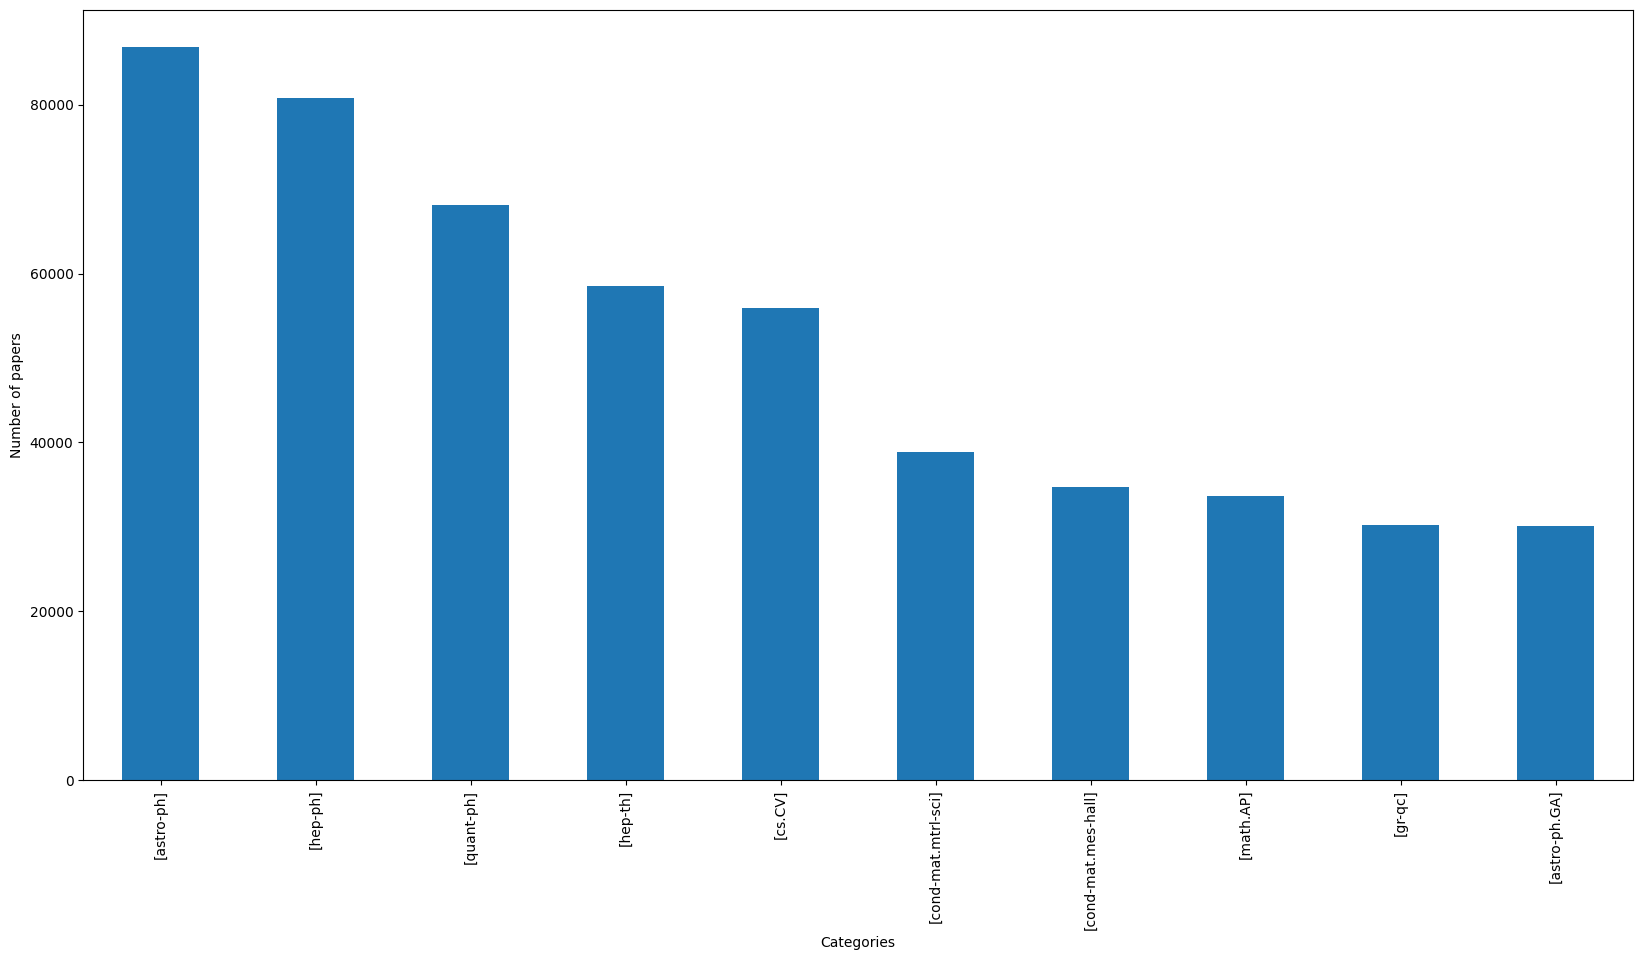

In [10]:
import matplotlib.pyplot as plt

# Plot the top 25 categories
categories_count.head(10).plot(kind='bar', figsize=(20, 10))
# set yaxis label to 'Number of papers'
plt.ylabel('Number of papers')
# set xaxis label to 'Categories'
plt.xlabel('Categories')
plt.show()


In [7]:
# count main categories (substring before the first dot)
df['main_categories'] = df['categories'].apply(lambda x: x[0].split('.')[0])


In [8]:
main_categories_count = df['main_categories'].value_counts()

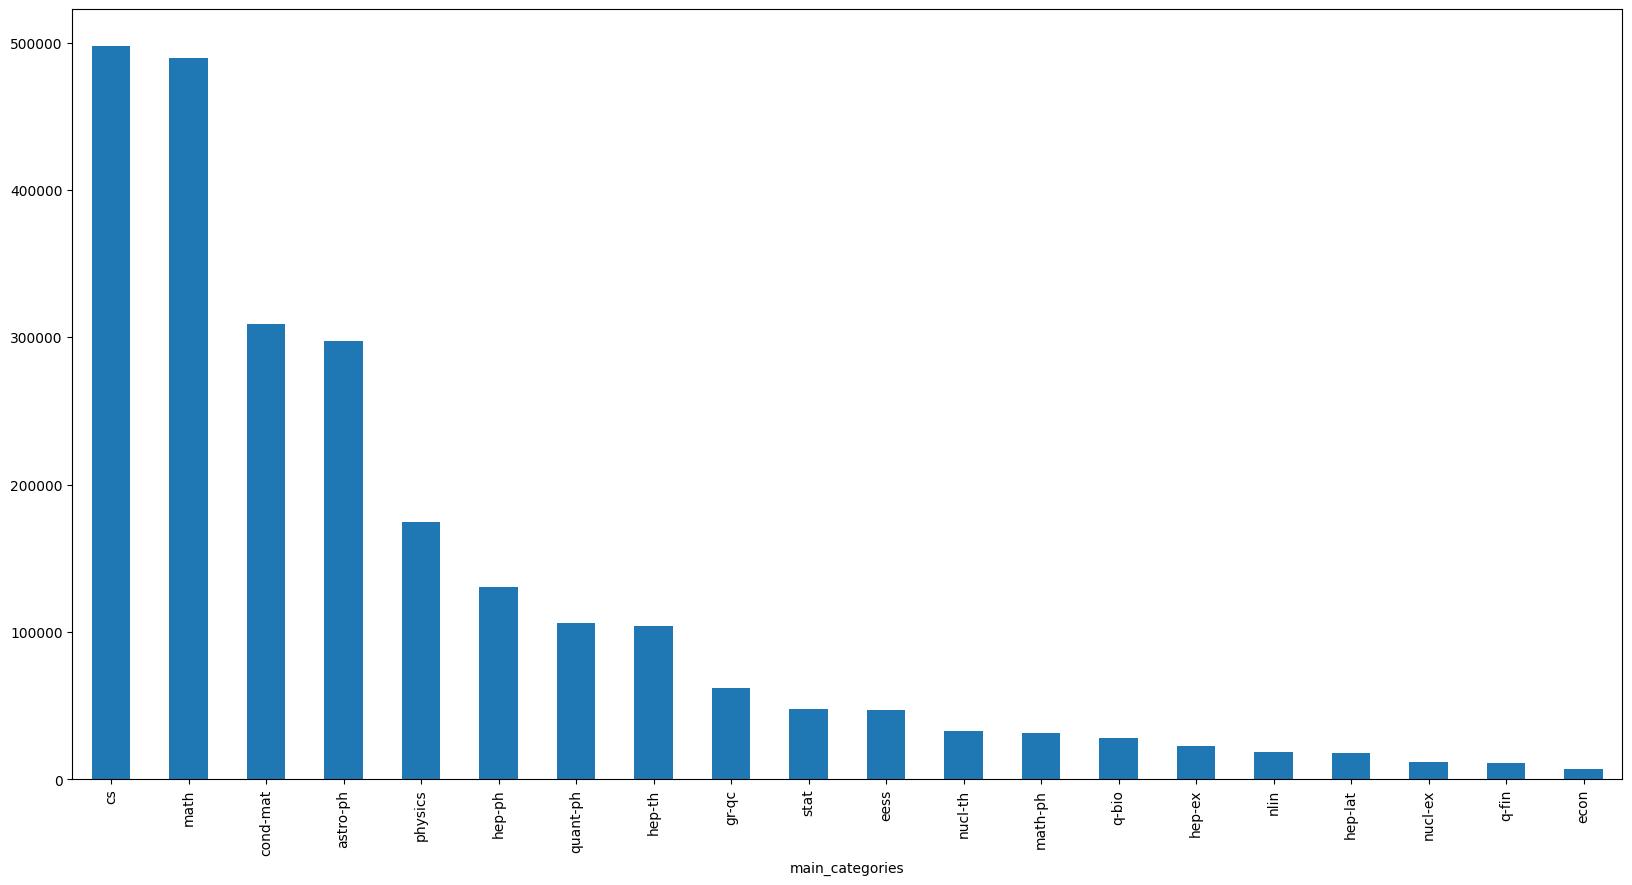

In [9]:
import matplotlib.pyplot as plt

# Plot the top 25 categories
main_categories_count.head(20).plot(kind='bar', figsize=(20, 10))
plt.show()

In [9]:
df_cs = df[df['categories'].apply(lambda x: 'cs' in x)]

In [11]:
# dump to pkl file
pkl_file_path = '../data/arxiv-metadata-oai-snapshot-complete.pkl'
with open(pkl_file_path, 'wb') as pkl_file:
    pickle.dump(df_cs, pkl_file)